# Bolsa de valores

Prevendo o volume de ações utilizando o modelo Random Forest Regressor

* Utilizaremos dados do Yahoo Finance da PETR4 num intervalo de tempo específico

* Dados serão obtido através da biblioteca Pandas DataReader

Importando bibliotecas

In [51]:
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np

Definindo janela de tempo

In [52]:
start = dt.datetime(2018,1,1)
end = dt.datetime(2020,8,31)

Obtendo dados da PETR4

In [53]:
PETR4 = web.DataReader('PETR4.SA',"yahoo",start,end)

Exibindo as cinco primeiras linhas

In [54]:
PETR4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,16.549999,16.190001,16.190001,16.549999,33461800.0,15.353477
2018-01-03,16.719999,16.370001,16.490000,16.700001,55940900.0,15.492632
2018-01-04,16.959999,16.620001,16.780001,16.730000,37064900.0,15.520465
2018-01-05,16.860001,16.570000,16.700001,16.830000,26958200.0,15.613236
2018-01-08,17.030001,16.709999,16.740000,17.030001,28400000.0,15.798776


Exibindo as cinco últimas linhas

In [55]:
PETR4.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-25,23.150000,22.690001,23.090000,22.870001,37981400.0,22.870001
2020-08-26,22.900000,22.040001,22.780001,22.219999,69925300.0,22.219999
2020-08-27,22.469999,22.040001,22.320000,22.150000,35489800.0,22.150000
2020-08-28,22.540001,22.059999,22.250000,22.540001,31071000.0,22.540001
2020-08-31,22.430000,21.889999,22.320000,21.889999,48539700.0,21.889999


Graficando valores de abertura, fechamento, mínimo e máximo

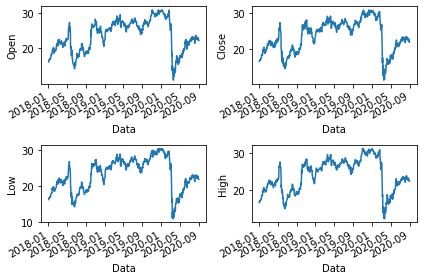

In [56]:
plt.subplot(2,2,1)
PETR4['Open'].plot(label='Open')
plt.xlabel('Data')
plt.ylabel('Open')
plt.subplot(2,2,2)
PETR4['Close'].plot(label='Close')
plt.xlabel('Data')
plt.ylabel('Close')
plt.subplot(2,2,3)
PETR4['Low'].plot(label='Low')
plt.xlabel('Data')
plt.ylabel('Low')
plt.subplot(2,2,4)
PETR4['High'].plot(label='High')
plt.xlabel('Data')
plt.ylabel('High')
plt.tight_layout()

Definindo variáveis X e Y

In [57]:
X = PETR4.drop(['Volume','Adj Close'],axis=1)
Y = PETR4['Volume']

* Criando amostra de treino e teste

In [58]:
X_treino = X[X.index<'2020-01-01'].values
X_teste = X[X.index>='2020-01-01'].values

Y_treino = Y[X.index<'2020-01-01'].values
Y_teste = Y[X.index>='2020-01-01'].values

* Prevendo volume utilizando modelo Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rfr = RandomForestRegressor()

In [61]:
rfr.fit(X_treino,Y_treino)

RandomForestRegressor()

In [62]:
Y_previsto = rfr.predict(X_teste)

In [63]:
Y_teste

array([3.777450e+07, 7.159560e+07, 8.184400e+07, 3.282200e+07,
       4.821560e+07, 3.610270e+07, 2.539750e+07, 3.067680e+07,
       3.979650e+07, 3.440570e+07, 2.899740e+07, 3.490800e+07,
       3.124140e+07, 2.857740e+07, 3.249150e+07, 5.375210e+07,
       3.689870e+07, 6.610530e+07, 4.725910e+07, 4.229750e+07,
       4.426680e+07, 5.544670e+07, 3.945280e+07, 5.765840e+07,
       6.799450e+07, 1.261140e+08, 5.451460e+07, 4.532810e+07,
       3.751820e+07, 6.485100e+07, 5.527710e+07, 3.039990e+07,
       3.868490e+07, 3.389090e+07, 4.418180e+07, 7.352290e+07,
       4.780510e+07, 1.001121e+08, 8.909530e+07, 7.159640e+07,
       8.685570e+07, 4.232050e+07, 6.972230e+07, 1.385976e+08,
       2.548138e+08, 1.704780e+08, 1.324824e+08, 1.515359e+08,
       1.749726e+08, 1.264328e+08, 1.492285e+08, 1.625152e+08,
       1.570652e+08, 1.490299e+08, 1.070924e+08, 1.142592e+08,
       1.582862e+08, 1.306184e+08, 1.014059e+08, 1.109472e+08,
       1.561165e+08, 1.144550e+08, 2.349512e+08, 1.4289

* Graficando Y_previsto em função de Y_teste

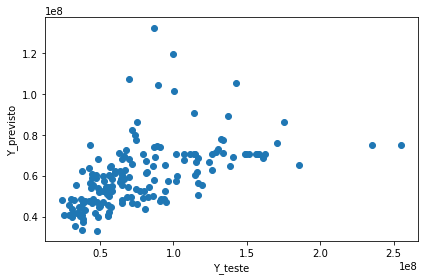

In [64]:
plt.scatter(Y_teste,Y_previsto)
plt.xlabel('Y_teste')
plt.ylabel('Y_previsto')
plt.tight_layout()

Calculando métricas de erro

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [66]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [67]:
MAE = mean_absolute_error(Y_teste,Y_previsto)
MAPE = mean_absolute_percentage_error(Y_teste,Y_previsto)
MSE = mean_squared_error(Y_teste,Y_previsto)
RMSE = np.sqrt(MSE)

In [68]:
print("MAE = {:0.2f}".format(MAE))
print("MAPE = {:0.2f}%".format(MAPE))
print("MSE = {:0.2f}".format(MSE))
print("RMSE = {:0.2f}".format(RMSE))

MAE = 26773106.92
MAPE = 28.78%
MSE = 1594188639467310.75
RMSE = 39927291.91


Podemos prever o valor com uma incerteza de 28.78%

Melhorias podem ser obtidas adicionando-se indicores da bolsa na amostra